In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)


In [2]:
from tensorflow import keras
from tensorflow.keras import layers


def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7007 - loss: 1.0269 - val_accuracy: 0.9231 - val_loss: 0.2609
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9100 - loss: 0.2807 - val_accuracy: 0.9379 - val_loss: 0.2033
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9452 - loss: 0.1724 - val_accuracy: 0.9423 - val_loss: 0.1956
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9626 - loss: 0.1191 - val_accuracy: 0.9357 - val_loss: 0.1970
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9692 - loss: 0.0930 - val_accuracy: 0.9617 - val_loss: 0.1273
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9799 - loss: 0.0627 - val_accuracy: 0.9578 - val_loss: 0.1433
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0470 - val_accuracy: 0.9617 - val_loss: 0.1376
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9899 - loss: 0.0332 - val_accuracy: 0.

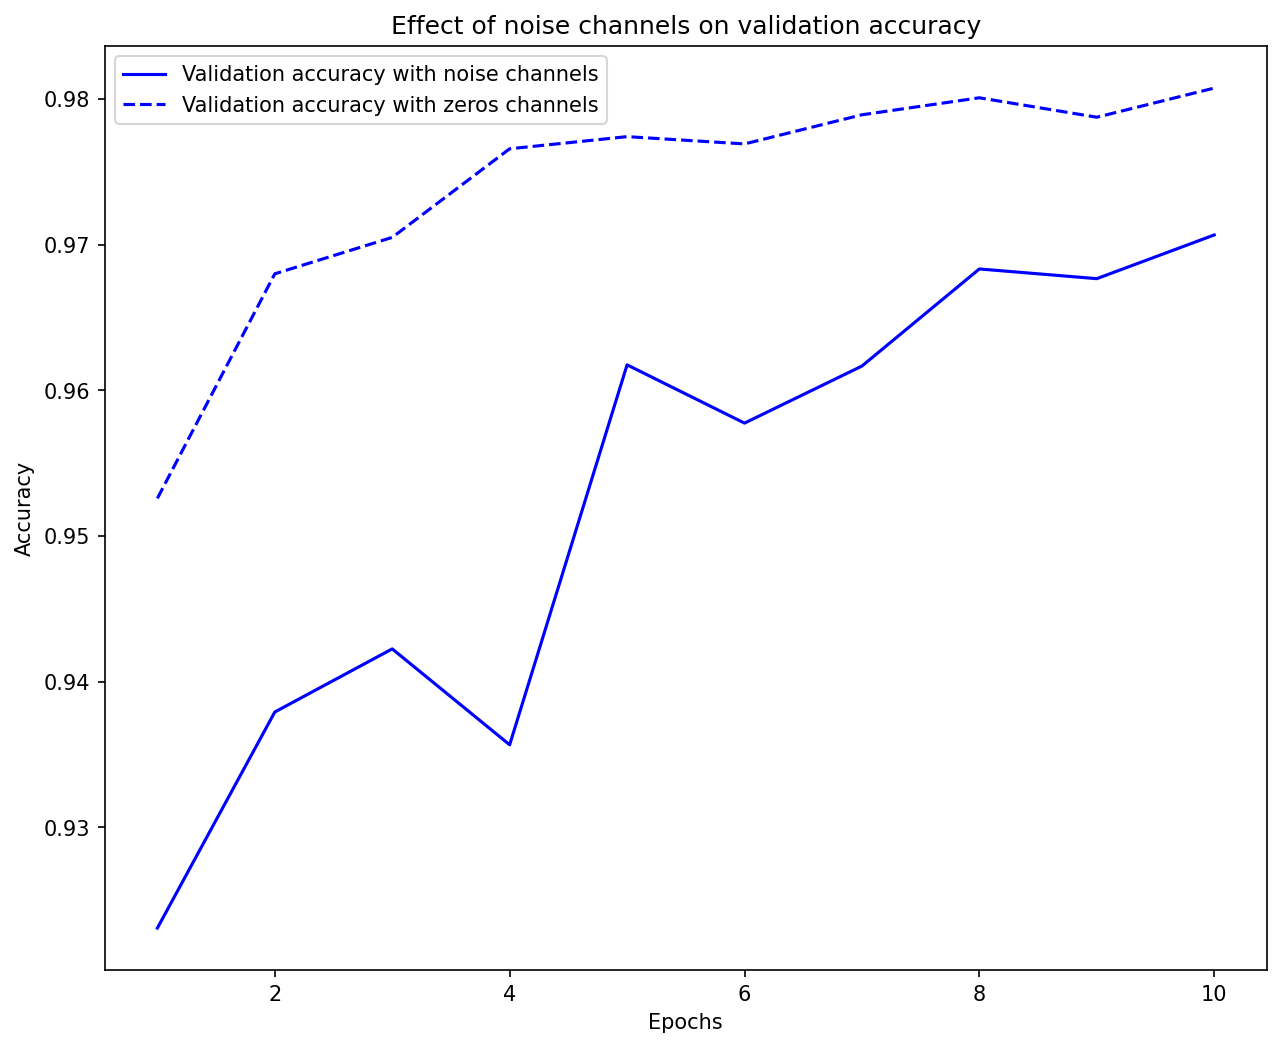

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=150)
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1038 - loss: 2.3301 - val_accuracy: 0.1033 - val_loss: 2.3041
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1208 - loss: 2.2974 - val_accuracy: 0.0962 - val_loss: 2.3169
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1320 - loss: 2.2876 - val_accuracy: 0.0993 - val_loss: 2.3195
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1423 - loss: 2.2748 - val_accuracy: 0.0986 - val_loss: 2.3256
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1565 - loss: 2.2585 - val_accuracy: 0.1020 - val_loss: 2.3374
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1685 - loss: 2.2359 - val_accuracy: 0.0983 - val_loss: 2.3499
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1874 - loss: 2.2097 - val_accuracy: 0.1033 - val_loss: 2.3632
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1986 - loss: 2.1852 - val_accu

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4308 - loss: 3628.5217 - val_accuracy: 0.2327 - val_loss: 2.0808
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2439 - loss: 4.0104 - val_accuracy: 0.1839 - val_loss: 2.5287
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2070 - loss: 2.6032 - val_accuracy: 0.1932 - val_loss: 2.3041
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2023 - loss: 2.4724 - val_accuracy: 0.2300 - val_loss: 2.2193
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2120 - loss: 2.4147 - val_accuracy: 0.2415 - val_loss: 2.1658
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2308 - loss: 2.1753 - val_accuracy: 0.2468 - val_loss: 2.0368
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2244 - loss: 2.3461 - val_accuracy: 0.2485 - val_loss: 2.1186
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2417 - loss: 2.4100 - val_accuracy: